# W24 CS 480/680 assignment 1 (coding part)


- Please save a copy of this notebook to avoid losing your changes.
- Debug your code and ensure that it can run before submission.
- Save the output of each cell. Failure to do so may result in your coding questions not being graded.
- Submit your completed version of this notebook.



## Implement Your Own Perceptron

In this question, you are asked to implement the **Perceptron** algorithm and test with a classification task on the adult dataset. Please refer to the [dataset webpage](https://archive.ics.uci.edu/dataset/53/iris) for details on the dataset, and consult the lecture slides and suggested readings for details on the Perceptron algorithm.

- `scikit-learn` or other off-the-shelf Perceptron libraries are not allowed to use.

- Please note that `class` column is the label of the dataset. The labellings have three possible values. So you need to implement a multi-class extension of Perceptron.

- Recording the accuracy on the training dataset when you train the Perceptron model on the training data, as an iteration. Repeat this step for 10 times.

- It is required that you split the dataset into training/testing datasets (80% and 20%, respectively), and we will deduct marks if you don't.

- You will get full marks for
    - Correctly split data into training set and testing set.
    - Correctly implement the perceptron algorithm.
    - Correctly handle multiple class.
    - A plot on training accuracy vs number of iterations, that relects the progress of the training.
    - Final reported accuracy (on the test dataset).

In [19]:
import urllib.request
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
# TODO: add any other package you need

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
filename = 'iris.csv'
urllib.request.urlretrieve(url, filename)

# Load the dataset into a Pandas dataframe
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(filename, names=column_names)


In [20]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Code for dataset splitting (training-testing):

In [21]:
n = int(0.8*len(data)) #120
train_data = data.sample(n, axis = 0)
test_data = data.drop(index=train_data.index)

Code for implemeting the Perceptron algorithm:
- You can either implement it as an class/object or implement the training function and the prediction function.

In [22]:
class Perceptron:
    w = np.zeros(4)
    b = 0  

    def __init__(self, dataset):
        self.dataset = dataset       

    def train_iteration(self):
        for x,y in self.dataset:
            if y*(np.dot(x,self.w) + self.b) <= 0:
                self.w = self.w + y*x
                self.b = self.b + y

    def predict(self, x) -> float:
        return np.dot(x,self.w) + self.b


Code for implementing a wrapper function:
- Handling multi-class extension
- Feeding in data and call Perceptron training function
- Outputing multiple Perceptrons that are trained

In [23]:
classes = data['class'].unique()

# one vs all
def multiclass(data):
    perceptrons = {}
    for k in classes:
        features = data.drop(columns=['class']).to_numpy()
        labels = np.where(data['class'] == k, 1, -1)
        p = Perceptron(list(zip(features, labels)))
        perceptrons[k] = p

    return perceptrons

def multiclass_predict(data, perceptrons)->float:
    accurate = 0
    for i, row in data.iterrows():
        y = row['class']
        x = row.to_numpy()[:-1]
        max_score = -np.infty
        pred_class = ""
        for k in classes:
            new_score = perceptrons[k].predict(x)
            if (new_score > max_score):
                max_score = new_score
                pred_class = k
        
        if pred_class == y:
            accurate = accurate + 1
    
    return accurate/len(data)


Code for testing and ploting:



Training Accuracies: [0.38333333333333336, 0.7916666666666666, 0.6083333333333333, 0.9083333333333333, 0.9, 0.9083333333333333, 0.85, 0.6583333333333333, 0.7833333333333333, 0.9083333333333333]
Final Test Accuracy: 0.9


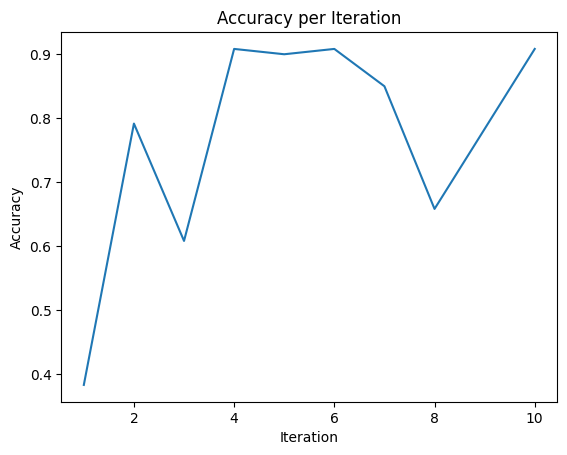

In [24]:
# TODO: plot the accuracy against the number of iterations
# TODO: report the final accuracy


perceptrons = multiclass(train_data)
training_accuracy = []

for t in range(10):
    for k in classes:
        perceptrons[k].train_iteration()
    training_accuracy.append(multiclass_predict(train_data, perceptrons))

    
final_accuracy = multiclass_predict(test_data, perceptrons)

print(f"Training Accuracies: {training_accuracy}")
print(f"Final Test Accuracy: {final_accuracy}")


plt.title("Accuracy per Iteration")
plt.plot(range(1, 11), training_accuracy)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()
    

